# 🔬 Análise de vendas de um E-commerce na Black Friday
---

In [91]:
# Preparando a caixa de ferramentas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [92]:
df = pd.read_csv('data/dataframe_final.csv')

In [93]:
df['Product_Category_1'] = df['Product_Category_1'].astype('Int64')
df['Product_Category_2'] = df['Product_Category_2'].astype('Int64')
df['Product_Category_3'] = df['Product_Category_3'].astype('Int64')

## 🔍 Questão 12
O estado civil influencia no valor gasto e na categoria de produto comprada? Mostre!

Se eu quisesse vender mais produtos da categoria 14, deveria investir em propagandas para qual estado civil?

### Influência de estado civil no valor gasto

#### 1. Estudo das variáveis: "Purchase" e "Marital Status"

A variável "Purchase" é do tipo numérica (quantitativa) contínua. Representa o valor gasto em cada compra realizada.

A variável "Marital Status" é do tipo categórica nominal, representada de forma binária: "0" representa um estado civil e "1" representa outro.

#### 2. Estudo do método de análise.

Para esse caso (variável categórica x variável numérica), há dois caminhos:

1. Pode-se usar o Teste-T Independente para concluir estatísticamente se o estado civil exerce influência sobre o valor da compra.
2. Pode-se analisar a correlação das variáveis visualmente com gráficos e tabelas de comparação.

Para usar o Teste-T Independente, a variável numérica deve ter distribuição normal. Podemos observar sua distribuição com um gráfico de histograma.

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

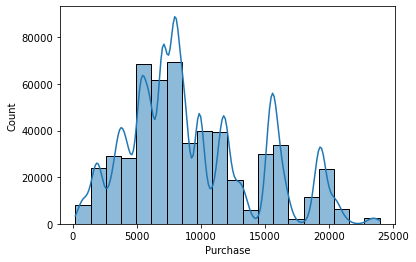

In [3]:
sns.histplot(df['Purchase'], bins=20, kde=True)

A normalidade da distribuição não é clara. 

Para chegar a uma conclusão robusta, uma análise mais profunda se fazer necessária. Podendo requerer o uso de testes de normalidade (Shapiro-Wilk, D'Agostino K^2 e Anderson Darling), análise outliers e manipulação dos dados de "Purchase".

Decidimos seguir com a alternativa 2.

#### 3. Análise da correlação entre as variáveis.

Observando a correlação com o uso do gráfico de Box Plot do Estado Civil x Valor e uma tabela de *group_by*.

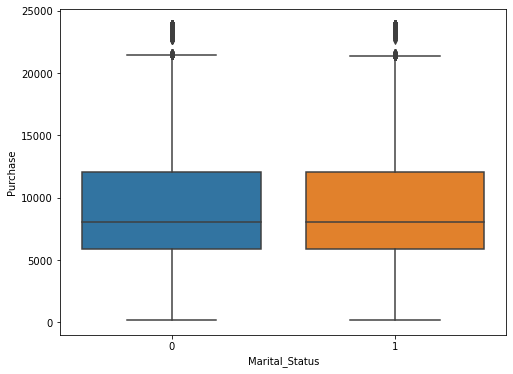

In [4]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Marital_Status', y='Purchase', data=df)

In [5]:
print('Média do valor da compra agrupada por estado civil:')
df[['Marital_Status', 'Purchase']].groupby(['Marital_Status'], as_index=False).mean()

Média do valor da compra agrupada por estado civil:


,Marital_Status,Purchase
0,0,9333.325467
1,1,9334.632681


#### 4. Conclusão da correlação.

O gráfico de Box Plot dos dois tipos de estado civil (0 e 1) são praticamente idênticos - assim como a média apresentada na tabela.

Podemos afirmar que **não há** correlação entre o estado civil e o valor gasto na compra.

### Influência de estado civil na categoria comprada

#### 1. Estudo das variáveis: "Marital_Status" e ("Product_Category_1", "Product_Category_2", "Product_Category_3")

A variável "Marital Status" é do tipo categórica nominal, representada de forma binária: "0" representa um estado civil e "1" representa outro.

As variáveis "Product_Category_X", apesar de serem representadas como inteiros, também são categóricas nominais.

#### 2. Estudo do método de análise.

Nesse caso (variável categórica x variável categórica), podemos usar o teste de Chi-Square para verificar a correlação ou observar o comportamento visualmente, por gráficos de coluna ou tabelas de dados categorizados. Seguiremos com a segunda opção.

#### 3. Análise da correlação entre as variáveis.

O primeiro desafio com o qual nos deparamos na escolha do método de análise: o dado a ser observado (contagem de cada categoria) está dividido em 3 colunas. Para isso, usamos o **pd.melted** e o **pd.crosstrab** para reunir as informações de forma a mostrar o **total** da soma de cada categoria para os dois estados civis possíves.

Além disso, é necessário normalizar os dados em relação à própria categoria - já que há um volume diferente de compras paracada estado civil.

In [69]:
# Criando um DataFrame somente com as categorias de produto
df_categories = df[['Marital_Status','Product_Category_1', 'Product_Category_2', 'Product_Category_3']]

# 'Melting' o DataFrame e renomeando as colunas para visualização
df_melted_categories = df_categories.melt(id_vars = 'Marital_Status')
df_melted_categories.rename({'value': 'Product_Category',
                             'variable': 'Variable'},
                            axis=1, 
                            inplace=True)

# Criando um Crosstab para a visualização dos dados
df_crosstab = pd.crosstab(index=df_melted_categories['Marital_Status'], 
                          columns=df_melted_categories['Product_Category'],
                          normalize='index') # Normalizando o Crosstab por estado civil

# Multiplicando os valores por 100 (para mostrar em porcentagem)
df_crosstab = df_crosstab * 100

Assim, podemos observar a porcentagem que cada estado civil comprou de cada tipo de produto e comparar o comportamento nos dois casos.

***Nota:*** *o Dataset apresenta o registro de 537.577 compras. Cada compra contém um produto que pode fazer parte de 1-3 categorias. Os dados foram normalizados (em 100%) para esse contexto específico: em relação ao total da contagem de valores das categorias.* 

In [67]:
df_crosstab.round(2)

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Marital_Status,,,,,,,,,,,,,,,,,,
0,13.08,6.82,2.25,3.74,17.95,3.88,0.37,17.06,1.68,0.83,3.78,1.66,1.92,6.8,6.62,7.94,2.71,0.91
1,12.64,6.55,2.06,3.40,17.57,3.79,0.44,18.12,1.54,1.01,3.58,1.79,2.06,7.0,6.65,7.78,2.96,1.05


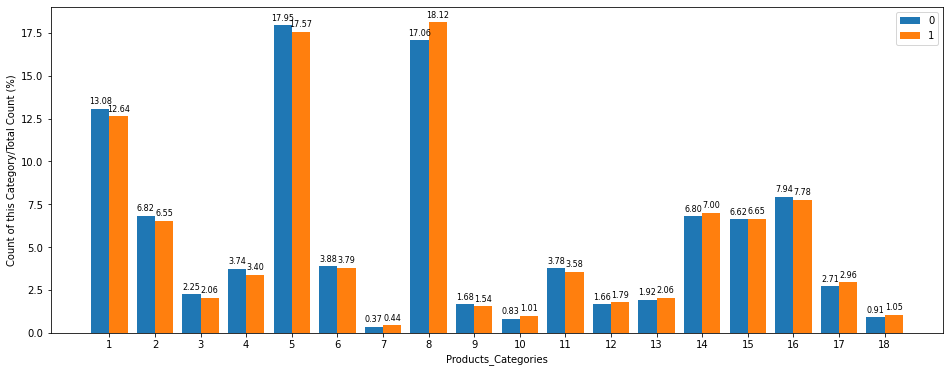

In [66]:
X = list(df_crosstab.columns)
Y0 = list(df_crosstab.iloc[0].values)
Y1 = list(df_crosstab.iloc[1].values)  
X_axis = np.arange(len(X))

fig, ax = plt.subplots(figsize=(16,6))

rects1 = ax.bar(X_axis - 0.2, Y0, 0.4, label = '0')
rects2 = ax.bar(X_axis + 0.2, Y1, 0.4, label = '1')

for chart in (rects1, rects2):
    for rect in chart:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), fontsize=8,
                    textcoords="offset points",
                    ha='center', va='bottom')
        
ax.set_xticks(X_axis)
ax.set_xticklabels(X)
ax.set_xlabel("Products_Categories")
ax.set_ylabel("Count of this Category/Total Count (%)")
ax.legend()

plt.show()

#### 4. Conclusão da correlação.

Notamos diferenças entre os dois estados civis. Porém, o padrão ainda é bastante aproximado. 

- As categorias 1, 5 e 8 representam 48% dos produtos para ambos estados civis.
- A maior diferença absoluta está na categoria 8: 1,06 p.p.
- A maior diferença relativa está na categoria 10: 22% (1,01% para o estado civil "1" e 0,83% para o estado civil "0."

Para chegar a uma conclusão robusta, um teste científico se faz necessário.

### Público-alvo de propagandas para a categoria 14

Se eu quisesse vender mais produtos da categoria 14, deveria investir em propagandas para qual estado civil?

Para responder essa pergunta, podemos aproveitar o que foi construído nas análises anteriores. Podemos observaro comportamento dos estados civis nas compras dos produtos das categoria 14.

In [144]:
# Visualizando o comportamento de cada estado civil para as categorias em valores absolutos
pd.crosstab(index=df_melted_categories['Marital_Status'], 
            columns=df_melted_categories['Product_Category'])

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Marital_Status,,,,,,,,,,,,,,,,,,
0,83230,43401,14314,23823,114206,24685,2369,108569,10672,5300,24066,10569,12208,43271,42129,50525,17234,5773
1,55123,28579,8970,14809,76640,16548,1914,79005,6737,4421,15612,7819,8986,30508,29002,33922,12912,4595


In [154]:
print('Valor gasto nas compras de produtos que se encaixam na categoria 14:')
df[filtro_categoria14].groupby(by='Marital_Status')['Purchase'].sum()

Valor gasto nas compras de produtos que se encaixam na categoria 14:


Marital_Status
0    343916804
1    242855346
Name: Purchase, dtype: int64

In [155]:
print('Valor gasto nas compras em geral:')
df.groupby(by='Marital_Status')['Purchase'].sum()

Valor gasto nas compras em geral:


Marital_Status
0    2966289500
1    2051378878
Name: Purchase, dtype: int64

#### Estado civil "0":
- Fez 317.817 compras:
    - Dessas compras, 43.271 tinham produtos que podem ser considerados da categoria 14 (na categoria 1, 2 ou 3).
    - Isso representa 13,6% das compras dessa categoria.
- Gastou R\$ 2.966.289.500,00:
    - Desse valor, R\$ 343.916.804,00 foi gasto com produtos que se encaixam na categoria 14.
    - Isso representa 11,59% do valor gasto por esse grupo.
    
    
#### Estado civil "1":
- Fez 219.760 compras
    - Dessas compras, 30.508 tinham produtos que podem ser considerados da categoria 14 (na categoria 1, 2 ou 3).
    - Isso representa 13,9% do total das compras dessa categoria.
- Gastou R\$ 2.051.378.878,00:
    - Desse valor, R\$ 242.855.346,00 foi gasto com produtos que se encaixam na categoria 14.
    - Isso representa 11,83% do valor gasto por esse grupo.
    
#### Resposta

Nenhum dos grupos apresentou uma característica que o colocasse como uma indicação clara de público-alvo para produtos da categoria 14. 

Para a tomada de decisão, pode-se considerar que o grupo do estado civil "0" fez mais compras e gastou mais no geral. Porém, a porcentagem de gastos do estado civil "1" foi levemente superior.

Mais questionamentos podem ser considerados para levar a uma decisão final: 
- Qual % do market-share o E-commerce possui de cada um dos mercados?
- Quanto custa o clique e atração de cada grupo?
- Quais são as % conversão de cada grupo no funil de vendas?
- Como é a retenção de cada grupo?